# Loading the Dataset

In [ ]:
!pip install scikit-learn pandas numpy shap fairlearn lime xgboost

In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-04-07 21:16:53--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.07s   

2025-04-07 21:16:54 (32.4 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’ saved [2546489/2546489]



In [ ]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 2.5M
-rw-r--r-- 1 root root 2.5M Apr  7 21:16 compas-scores-two-years.csv


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
df.shape

(7214, 53)

In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [ ]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
filtered_df = df[(df['is_recid'] == 1) & (df['two_year_recid'] == 0)]
filtered_df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
54,79,mackenson nelson,mackenson,nelson,2013-03-18,Male,1984-09-24,31,25 - 45,African-American,0,5,0,1,15,-1.0,2013-03-17 09:02:33,2013-07-31 08:23:26,13003864CF10A,2013-03-17,NaN,1.0,F,Attempt Armed Burglary Dwell,1,16006319TC10A,(M2),NaN,2016-02-28,Operating W/O Valid License,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,2013-03-18,Risk of Violence,7,Medium,2013-03-18,2013-03-17,2013-07-31,15,135,1077,1,0
139,215,brandon flanders,brandon,flanders,2013-01-17,Male,1985-04-16,31,25 - 45,African-American,0,2,0,0,1,-1.0,2013-01-16 05:37:32,2013-01-17 07:15:11,13001130MM10A,2013-01-16,NaN,1.0,M,Lewdness Violation,1,16012589TC40A,(M2),NaN,2016-03-02,Driving License Suspended,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,2,Low,2013-01-17,Risk of Violence,3,Low,2013-01-17,2013-01-16,2013-01-17,1,0,1140,1,0
188,281,richard roberts,richard,roberts,2013-06-11,Male,1949-09-14,66,Greater than 45,African-American,0,1,0,0,3,-10.0,2013-06-01 11:04:44,2013-06-03 11:25:14,13007789CF10A,2013-06-01,NaN,10.0,F,Agg Battery Grt/Bod/Harm,1,16000414MM20A,(M1),NaN,2016-01-10,Battery,NaN,NaN,NaN,1,16000414MM20A,(M1),2016-01-10,Battery,Risk of Recidivism,1,Low,2013-06-11,Risk of Violence,1,Low,2013-06-11,2013-06-01,2013-06-03,3,0,943,1,0
197,294,clifton mccree,clifton,mccree,2014-01-31,Male,1982-03-05,34,25 - 45,African-American,0,2,0,0,2,0.0,2014-01-31 12:35:27,2014-02-26 05:50:20,14001687MM10A,2014-01-30,NaN,1.0,M,Battery,1,16002539CF10A,(F3),0.0,2016-02-28,NaN,2016-02-28,2016-03-22,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,2,Low,2014-01-31,Risk of Violence,1,Low,2014-01-31,2016-02-28,2016-03-22,2,26,758,1,0
227,335,kip stubbs,kip,stubbs,2013-02-17,Male,1979-04-03,37,25 - 45,African-American,0,1,0,0,0,-1.0,2013-02-16 07:22:50,2013-02-18 02:10:02,13003388MM10A,2013-02-16,NaN,1.0,M,Battery,1,15007263MM10A,(M1),0.0,2015-07-07,Battery,2015-07-07,2015-07-20,NaN,1,15007263MM10A,(M1),2015-07-07,Battery,Risk of Recidivism,1,Low,2013-02-17,Risk of Violence,1,Low,2013-02-17,2015-07-07,2015-07-20,0,1,870,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,10781,jaynell bristol,jaynell,bristol,2013-07-17,Male,1968-07-07,47,Greater than 45,African-American,0,1,0,0,1,-3.0,2013-07-14 11:11:51,2013-07-15 01:37:10,13009878CF10A,2013-07-14,NaN,3.0,F,Battery on Law Enforc Officer,1,15011421MM10A,(M1),0.0,2015-10-30,Resist/Obstruct W/O Violence,2015-10-30,2015-10-31,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-07-17,Risk of Violence,2,Low,2013-07-17,2015-10-30,2015-10-31,1,0,835,1,0
7074,10787,lisa scott,lisa,scott,2013-05-10,Female,1970-07-28,45,Greater than 45,African-American,0,7,0,0,9,0.0,2013-05-10 04:46:42,2013-07-24 09:08:35,13009083MM10A,2013-05-10,NaN,0.0,M,Battery,1,15001303MM30A,(M1),NaN,2015-08-04,Criminal Mischief>$200<$1000,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-05-10,Risk of Violence,9,High,2013-05-10,2013-05-10,2013-07-24,9,75,816,1,0
7131,10884,michael russo,michael,russo,2013-02-01,Male,1988-03-16,28,25 - 45,Caucasian,0,6,0,0,11,-1.0,2013-01-31 06:11:58,2013-02-01 08:36:46,13001560CF10A,NaN,2013-01-31,1.0,F,arrest case no charge,1,15004516MM40A,(M2),NaN,2015-11-22,Driving License 

In [ ]:
df.two_year_recid.value_counts()
# recid rate 45.1%

,count
two_year_recid,
0,3963
1,3251


# Preprocessing

In [ ]:
df["two_year_recid"].value_counts()

,count
two_year_recid,
0,3963
1,3251


In [ ]:
df["is_recid"].value_counts()

,count
is_recid,
0,3743
1,3471


In [ ]:
(df['two_year_recid']==df['is_recid']).value_counts()

,count
True,6994
False,220


### **Identifiers & Personal Information:**
1. **'id'** – Unique identifier for each individual in the dataset.  
2. **'name'** – Full name of the individual.  
3. **'first'** – First name of the individual.  
4. **'last'** – Last name of the individual.  
5. **'dob'** – Date of birth.  
6. **'sex'** – Gender of the individual (Male/Female).  
7. **'race'** – Ethnicity of the individual (e.g., African-American, Caucasian, etc.).  

In [ ]:
df = pd.get_dummies(df, columns=['race'], drop_first=False, dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)

In [ ]:
columns_to_drop = ['id','name','first','last','dob']

### **Demographic & Age Information:**
8. **'age'** – Age of the individual at the time of assessment.  
9. **'age_cat'** – Categorized age groups (e.g., 18-25, 26-45, 46+).  

In [ ]:
df['age_cat'].value_counts()

,count
age_cat,
25 - 45,4109
Greater than 45,1576
Less than 25,1529


In [ ]:
# Define age bins and labels
bins = [18, 25, 35, 45, float('inf')]  # 46+ uses infinity
labels = ['18-25', '26-35', '36-45', '46+']

# Create categorical age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [ ]:
df['age_group'].value_counts()

,count
age_group,
26-35,2581
18-25,1858
46+,1463
36-45,1309


In [ ]:
# Convert to one-hot encoding with prefix "age_"
df = pd.get_dummies(df, columns=['age_group'], prefix='age', dtype=int)

In [ ]:
df

,id,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+
0,1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0,0,0,0,0,1,1,0,0,0,1
1,3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1,0,0,0,0,0,1,0,1,0,0
2,4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,1,0,0,0,0,0,1,1,0,0,0
3,5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1,0,0,0,0,0,1,1,0,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,1973-01-22,43,25 - 45,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,1992-07-17,23,Less than 25,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,1,0,0,0,0,0,1,1,0,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,1993-03-25,23,Less than 25,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,1,0,0,0,0,0,1,1,0,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,1958-10-01,57,Greater than 45,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-

In [ ]:
columns_to_drop += ['age', 'age_cat']

### **Criminal History & Prior Records:**
10. **'juv_fel_count'** – Number of juvenile felony convictions.  
11. **'juv_misd_count'** – Number of juvenile misdemeanor convictions.  
12. **'juv_other_count'** – Number of other juvenile offenses.  
13. **'priors_count'** – Total number of prior adult convictions.  

In [ ]:
# columns_to_drop += ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']

### **Current Case Information:**
14. **'compas_screening_date'** – Date when the COMPAS risk assessment was conducted.  
15. **'c_case_number'** – Unique identifier for the individual's criminal case.  
16. **'c_offense_date'** – Date of the current offense.  
17. **'c_arrest_date'** – Date of the arrest for the current charge.  
18. **'c_charge_degree'** – Severity of the current charge (M = Misdemeanor, F = Felony).  
19. **'c_charge_desc'** – Description of the current charge (e.g., 'Grand Theft', 'Drug Possession').  
20. **'c_days_from_compas'** – Number of days between COMPAS assessment and the current case.  

In [ ]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date', 'c_charge_desc']

In [ ]:
df['c_charge_desc'].value_counts()

,count
c_charge_desc,
Battery,1156
arrest case no charge,1137
Possession of Cocaine,474
Grand Theft in the 3rd Degree,425
Driving While License Revoked,200
...,...
Poss Pyrrolidinobutiophenone,1
Conspiracy Dealing Stolen Prop,1
Felony DUI - Enhanced,1


### Was testing to see if we could one hot encode c_charge_desc. Conclusion: Too unpredictable as a feature to predict recidivism. c_charge_degree is a good enough feature to keep


In [ ]:
# # Count total occurrences of each charge type
# charge_counts = df['c_charge_desc'].value_counts()

# # Filter out charge descriptions with fewer than 10 total cases
# valid_charges = charge_counts[charge_counts >= 10].index
# df_filtered = df[df['c_charge_desc'].isin(valid_charges)]

# # Recalculate total and recidivism cases for the filtered data
# charge_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].count()
# recid_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].sum()

# # Calculate recidivism percentage
# recid_percentage_filtered = (recid_counts_filtered / charge_counts_filtered) * 100

# # Get top 10 charge types with the highest recidivism percentage
# top_10_recid_filtered = recid_percentage_filtered.nlargest(10)

# # Display the result
# print(top_10_recid_filtered)

In [ ]:
# # Get top 30 most common charge descriptions
# top_30 = df['c_charge_desc'].value_counts().nlargest(30).index

# # Create binary columns with "c_charge_" prefix
# for charge in top_30:
#     df[f'c_charge_{charge}'] = (df['c_charge_desc'] == charge).astype(int)

# # Create "Other" column
# df['c_charge_Other'] = (~df['c_charge_desc'].isin(top_30)).astype(int)

# # Drop the original column
# df = df.drop(columns=['c_charge_desc'])

In [ ]:
df.groupby('two_year_recid')['c_charge_degree'].value_counts()

two_year_recid  c_charge_degree
0               F                  2384
                M                  1579
1               F                  2282
                M                   969
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['c_charge_degree'], drop_first=True, dtype=int)

### **Jail Custody Information:**
21. **'c_jail_in'** – Date the individual was jailed for the current offense.  
22. **'c_jail_out'** – Date the individual was released from jail for the current offense.

In [ ]:
# df = df.dropna(subset=['c_jail_in', 'c_jail_out'])

In [ ]:
columns_to_drop += ['c_jail_in','c_jail_out']

### **Recidivism (Reoffense) Information:**
23. **'is_recid'** – 1 if the individual reoffended, 0 otherwise.  
24. **'two_year_recid'** – 1 if the individual reoffended within two years, 0 otherwise.  


In [ ]:
# columns_to_drop += ['is_recid']
# columns_to_drop += ['two_year_recid']

### **Reoffense Case Details:**
25. **'r_case_number'** – Case number for the recidivism offense.  
26. **'r_offense_date'** – Date of the reoffense.  
27. **'r_arrest_date'** – Date of arrest for the reoffense.  
28. **'r_days_from_arrest'** – Days between the original offense and the reoffense.  
29. **'r_charge_degree'** – Severity of the reoffense (M = Misdemeanor, F = Felony).  
30. **'r_charge_desc'** – Description of the reoffense charge.  
31. **'r_jail_in'** – Jail entry date for the reoffense.  
32. **'r_jail_out'** – Jail exit date for the reoffense.  

In [ ]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_charge_degree', 'r_charge_desc', 'r_jail_in', 'r_jail_out']

### **Violent Recidivism Information:**
33. **'violent_recid'** – Number of times the individual has committed a violent reoffense.  
34. **'is_violent_recid'** – 1 if the individual committed a violent reoffense, 0 otherwise.  
35. **'vr_case_number'** – Case number for violent recidivism.  
36. **'vr_offense_date'** – Date of the violent reoffense.  
37. **'vr_charge_degree'** – Severity of the violent reoffense (M = Misdemeanor, F = Felony).  
38. **'vr_charge_desc'** – Description of the violent reoffense charge.  

In [ ]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6395
1,819


In [ ]:
df['vr_charge_degree'].value_counts()

,count
vr_charge_degree,
(M1),344
(F3),228
(F2),162
(F1),38
(M2),19
(F7),18
(MO3),5
(F6),4
(F5),1


In [ ]:
columns_to_drop += ['violent_recid', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc']

### **COMPAS Risk Assessment Scores:**
39. **'type_of_assessment'** – Type of risk assessment (e.g., General Recidivism, Violent Recidivism).  
40. **'decile_score'** – Risk score (1-10) predicting likelihood of recidivism.  
41. **'score_text'** – Categorical risk level based on 'decile_score' (Low, Medium, High).  
42. **'decile_score.1'** – Duplicate of 'decile_score'.  

In [ ]:
columns_to_drop += ['type_of_assessment','decile_score', 'score_text', 'decile_score.1']

### **Violent Recidivism Risk Scores:**
43. **'v_type_of_assessment'** – Type of assessment for violent recidivism.  
44. **'v_decile_score'** – Risk score (1-10) predicting violent reoffense.  
45. **'v_score_text'** – Categorical risk level for violent recidivism (Low, Medium, High).  
46. **'v_screening_date'** – Date of the violent recidivism assessment.  

In [ ]:
columns_to_drop += ['v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date']

### **Additional Features & Redundant Columns:**
47. **'days_b_screening_arrest'** – Days between arrest and COMPAS screening.  
48. **'priors_count.1'** – Duplicate of 'priors_count'.  
49. **'in_custody'** – Date when the person entered custody.  
50. **'out_custody'** – Date when the person left custody.  
51. **'start'** – Beginning of a time-based event (not clearly defined).  
52. **'end'** – End of a time-based event (not clearly defined).  
53. **'event'** – An unspecified event indicator.  


In [ ]:
df.groupby('two_year_recid')['event'].value_counts()

two_year_recid  event
0               0        3817
                1         146
1               1        2616
                0         635
Name: count, dtype: int64

In [ ]:
# df['total_prior_convictions'] = df['juv_fel_count'] + df['juv_misd_count'] + df['juv_other_count'] + df['priors_count']

In [ ]:
columns_to_drop += ['days_b_screening_arrest', 'priors_count.1','in_custody','out_custody','start','end','event']

In [ ]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'age',
 'age_cat',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_charge_desc',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_charge_degree',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'vr_case_number',
 'vr_offense_date',
 'vr_charge_degree',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'decile_score.1',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [ ]:
df = df.drop(columns=columns_to_drop,axis=1)

In [ ]:
df = df.drop(columns = ['screening_date'])

In [ ]:
df.columns

Index(['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'is_recid', 'is_violent_recid', 'two_year_recid',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Male',
       'age_18-25', 'age_26-35', 'age_36-45', 'age_46+', 'c_charge_degree_M'],
      dtype='object')

In [ ]:
df.head()

,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+,c_charge_degree_M
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,4,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
3,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
df.shape

(7214, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   juv_fel_count          7214 non-null   int64
 1   juv_misd_count         7214 non-null   int64
 2   juv_other_count        7214 non-null   int64
 3   priors_count           7214 non-null   int64
 4   is_recid               7214 non-null   int64
 5   is_violent_recid       7214 non-null   int64
 6   two_year_recid         7214 non-null   int64
 7   race_African-American  7214 non-null   int64
 8   race_Asian             7214 non-null   int64
 9   race_Caucasian         7214 non-null   int64
 10  race_Hispanic          7214 non-null   int64
 11  race_Native American   7214 non-null   int64
 12  race_Other             7214 non-null   int64
 13  sex_Male               7214 non-null   int64
 14  age_18-25              7214 non-null   int64
 15  age_26-35              7214 non-null  

### Visualizing overlap between features and targets

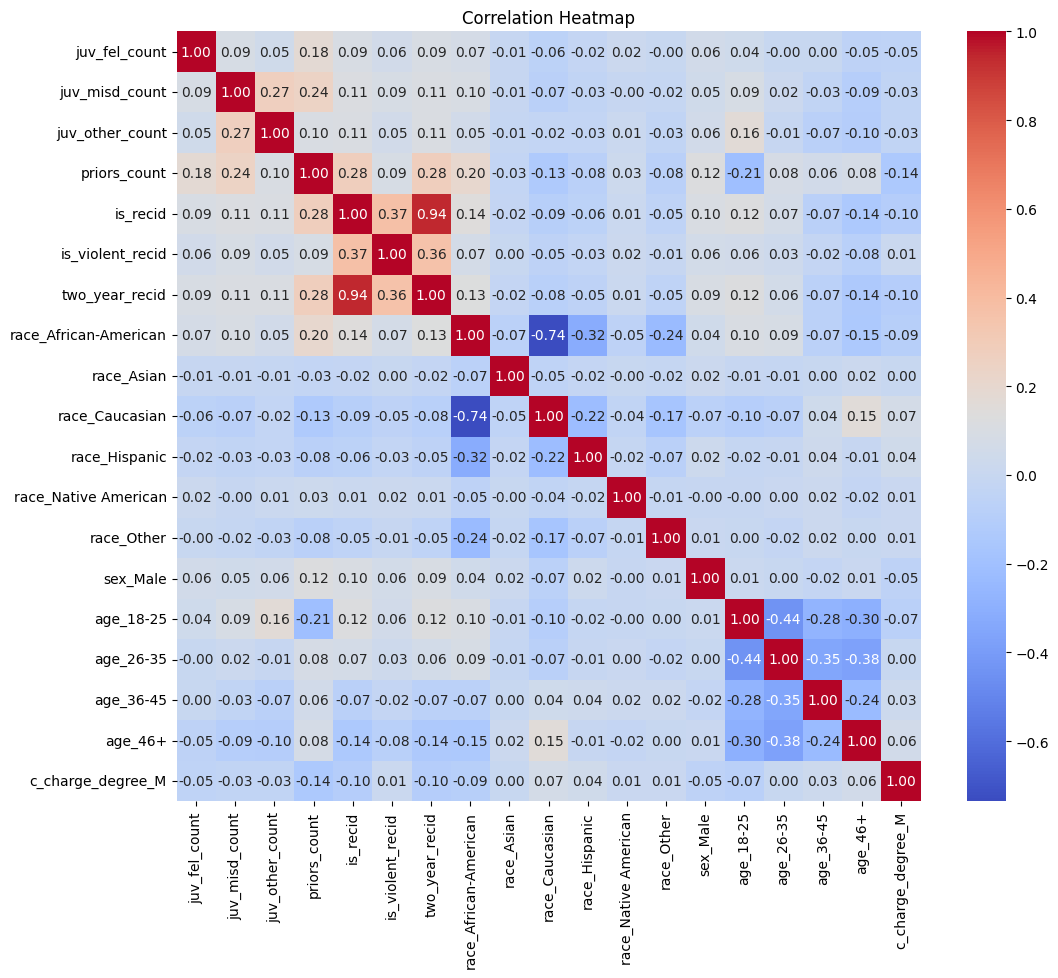

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

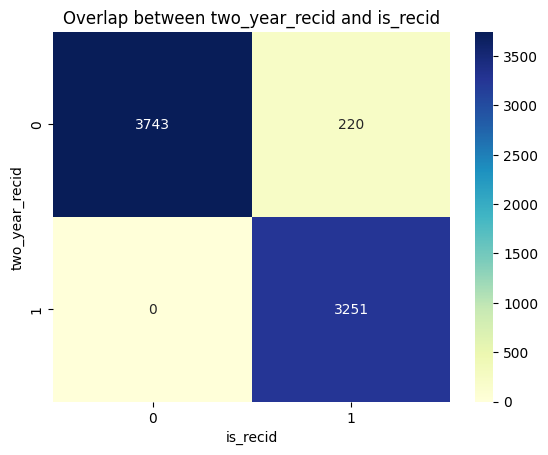

In [ ]:
import seaborn as sns

# Create a crosstab to count occurrences
conf_matrix = pd.crosstab(df['two_year_recid'], df['is_recid'],
                          rownames=['two_year_recid'], colnames=['is_recid'])

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Overlap between two_year_recid and is_recid")
plt.xlabel("is_recid")
plt.ylabel("two_year_recid")
plt.show()

In [ ]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6395
1,819


# Train Test Split

In [ ]:
X = df.drop(columns=['two_year_recid', 'is_recid', 'is_violent_recid'],axis=1)

In [ ]:
y = df[['is_recid', 'two_year_recid', 'is_violent_recid']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## two_year_recid

In [ ]:
y_train_two_year_recid = y_train['two_year_recid']
y_test_two_year_recid = y_test['two_year_recid']
y_train_two_year_recid.shape, y_test_two_year_recid.shape

((5771,), (1443,))

###XGB

In [ ]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train_two_year_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_1 = model_1.predict(X_test)

Accuracy: 0.6735966735966736
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.73       823
           1       0.64      0.55      0.59       620

    accuracy                           0.67      1443
   macro avg       0.67      0.66      0.66      1443
weighted avg       0.67      0.67      0.67      1443

Confusion Matrix:
 [[629 194]
 [277 343]]


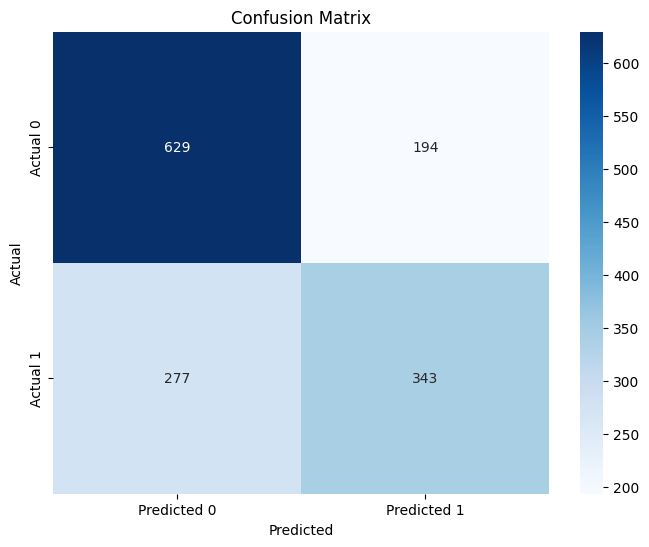

In [ ]:
# Calculate accuracy
accuracy_1 = accuracy_score(y_test_two_year_recid, y_pred_1)
print(f"Accuracy: {accuracy_1}")

# Generate classification report
class_report_1 = classification_report(y_test_two_year_recid, y_pred_1)
print("Classification Report:\n", class_report_1)

# Generate confusion matrix
conf_matrix_1 = confusion_matrix(y_test_two_year_recid, y_pred_1)
print("Confusion Matrix:\n", conf_matrix_1)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###SVC

In [ ]:
from sklearn.svm import SVC
model_2 = SVC(random_state=42)
model_2.fit(X_train, y_train_two_year_recid)

SVC(random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       823
           1       0.68      0.53      0.60       620

    accuracy                           0.69      1443
   macro avg       0.69      0.67      0.67      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[668 155]
 [289 331]]


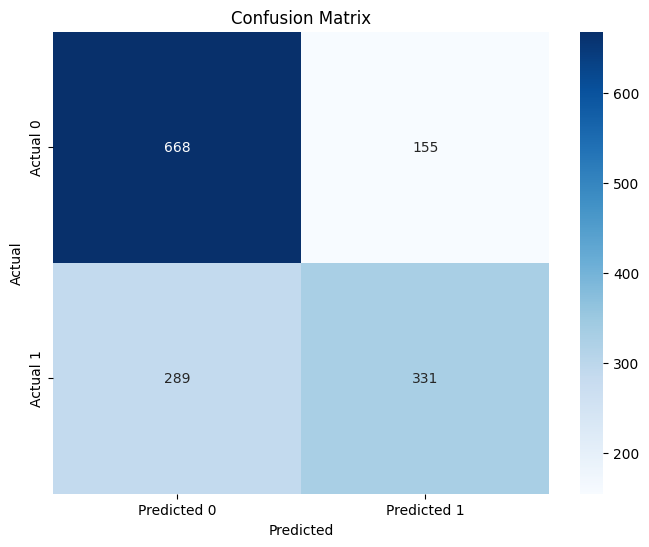

In [ ]:
# Calculate accuracy
accuracy_2 = accuracy_score(y_test_two_year_recid, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test_two_year_recid, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test_two_year_recid, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train, y_train_two_year_recid)

LogisticRegression(random_state=42)

In [ ]:
y_pred_3 = model_3.predict(X_test)

Accuracy: 0.6832986832986833
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       823
           1       0.64      0.60      0.62       620

    accuracy                           0.68      1443
   macro avg       0.68      0.67      0.67      1443
weighted avg       0.68      0.68      0.68      1443

Confusion Matrix:
 [[617 206]
 [251 369]]


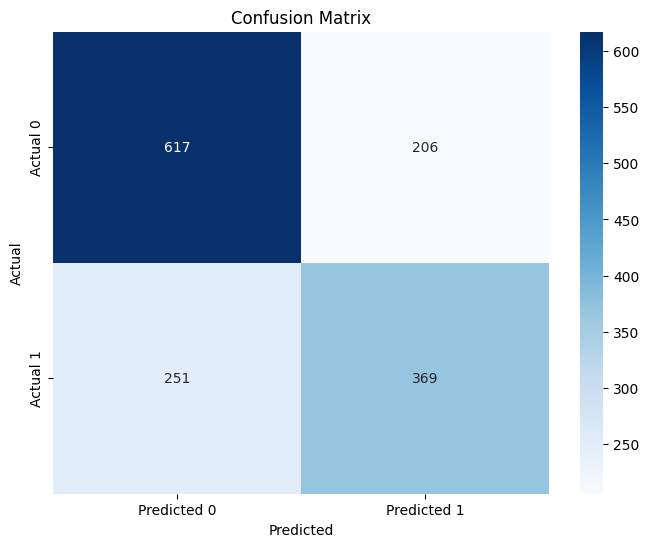

In [ ]:
# Calculate accuracy
accuracy_3 = accuracy_score(y_test_two_year_recid, y_pred_3)
print(f"Accuracy: {accuracy_3}")

# Generate classification report
class_report_3 = classification_report(y_test_two_year_recid, y_pred_3)
print("Classification Report:\n", class_report_3)

# Generate confusion matrix
conf_matrix_3 = confusion_matrix(y_test_two_year_recid, y_pred_3)
print("Confusion Matrix:\n", conf_matrix_3)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_4 = GradientBoostingClassifier(random_state=42)
model_4.fit(X_train, y_train_two_year_recid)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_4 = model_4.predict(X_test)

Accuracy: 0.6909216909216909
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       823
           1       0.65      0.60      0.63       620

    accuracy                           0.69      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443

Confusion Matrix:
 [[625 198]
 [248 372]]


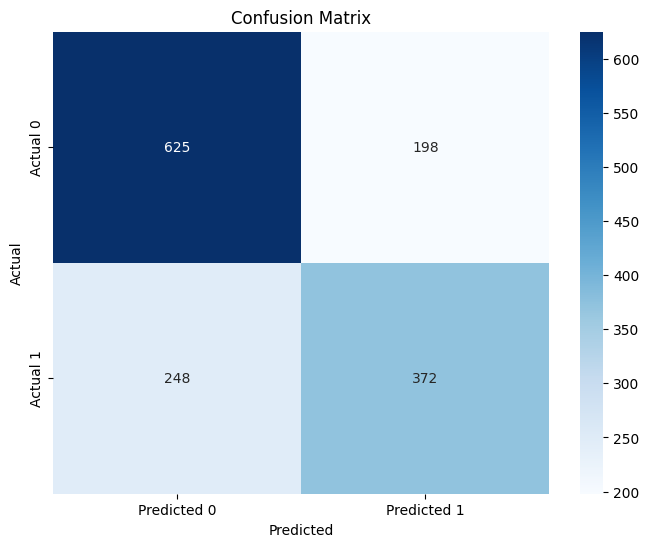

In [ ]:
# Calculate accuracy
accuracy_4 = accuracy_score(y_test_two_year_recid, y_pred_4)
print(f"Accuracy: {accuracy_4}")

# Generate classification report
class_report_4 = classification_report(y_test_two_year_recid, y_pred_4)
print("Classification Report:\n", class_report_4)

# Generate confusion matrix
conf_matrix_4 = confusion_matrix(y_test_two_year_recid, y_pred_4)
print("Confusion Matrix:\n", conf_matrix_4)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## is_recid


In [ ]:
y_train_is_recid = y_train['is_recid']
y_test_is_recid = y_test['is_recid']
y_train_is_recid.shape, y_test_is_recid.shape

((5771,), (1443,))

###XGB

In [ ]:
model_5 = xgb.XGBClassifier(random_state=42)
model_5.fit(X_train, y_train_is_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_5 = model_5.predict(X_test)

Accuracy: 0.6687456687456688
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       789
           1       0.64      0.61      0.63       654

    accuracy                           0.67      1443
   macro avg       0.67      0.66      0.66      1443
weighted avg       0.67      0.67      0.67      1443

Confusion Matrix:
 [[564 225]
 [253 401]]


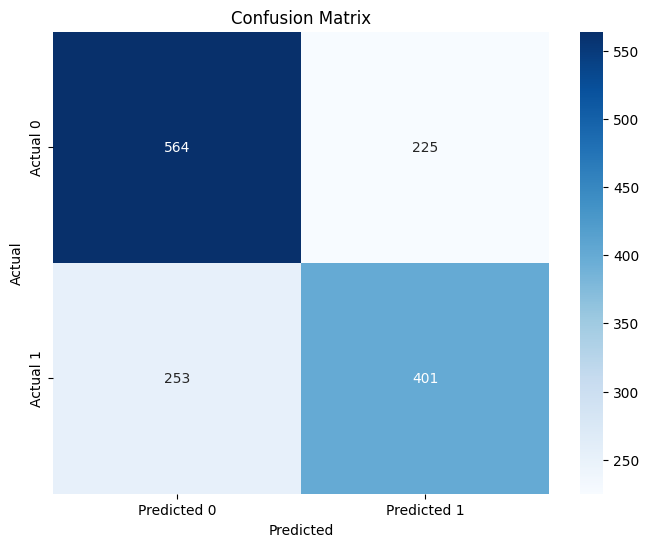

In [ ]:
# Calculate accuracy
accuracy_5 = accuracy_score(y_test_is_recid, y_pred_5)
print(f"Accuracy: {accuracy_5}")

# Generate classification report
class_report_5 = classification_report(y_test_is_recid, y_pred_5)
print("Classification Report:\n", class_report_5)

# Generate confusion matrix
conf_matrix_5 = confusion_matrix(y_test_is_recid, y_pred_5)
print("Confusion Matrix:\n", conf_matrix_5)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###SVC

In [ ]:
from sklearn.svm import SVC
model_6 = SVC(random_state=42)
model_6.fit(X_train, y_train_is_recid)

SVC(random_state=42)

In [ ]:
y_pred_6 = model_6.predict(X_test)

Accuracy: 0.6846846846846847
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       789
           1       0.67      0.61      0.64       654

    accuracy                           0.68      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.68      0.68      0.68      1443

Confusion Matrix:
 [[592 197]
 [258 396]]


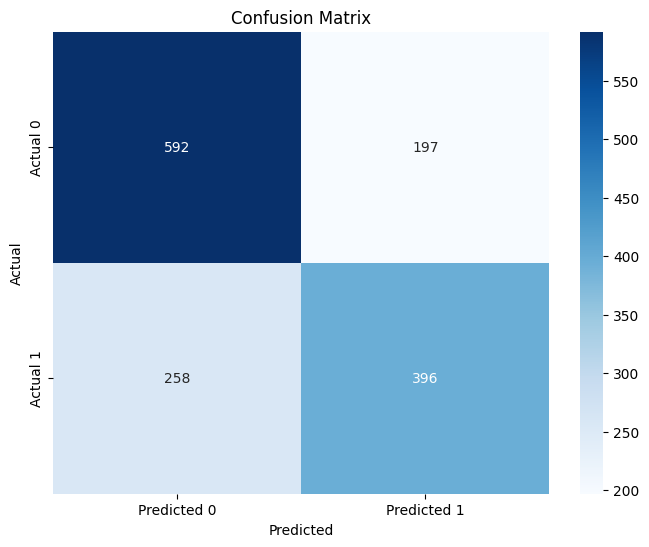

In [ ]:
# Calculate accuracy
accuracy_6 = accuracy_score(y_test_is_recid, y_pred_6)
print(f"Accuracy: {accuracy_6}")

# Generate classification report
class_report_6 = classification_report(y_test_is_recid, y_pred_6)
print("Classification Report:\n", class_report_6)

# Generate confusion matrix
conf_matrix_6 = confusion_matrix(y_test_is_recid, y_pred_6)
print("Confusion Matrix:\n", conf_matrix_6)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
model_7 = LogisticRegression(random_state=42)
model_7.fit(X_train, y_train_is_recid)

LogisticRegression(random_state=42)

In [ ]:
y_pred_7 = model_7.predict(X_test)

Accuracy: 0.6742896742896742
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       789
           1       0.64      0.63      0.64       654

    accuracy                           0.67      1443
   macro avg       0.67      0.67      0.67      1443
weighted avg       0.67      0.67      0.67      1443

Confusion Matrix:
 [[558 231]
 [239 415]]


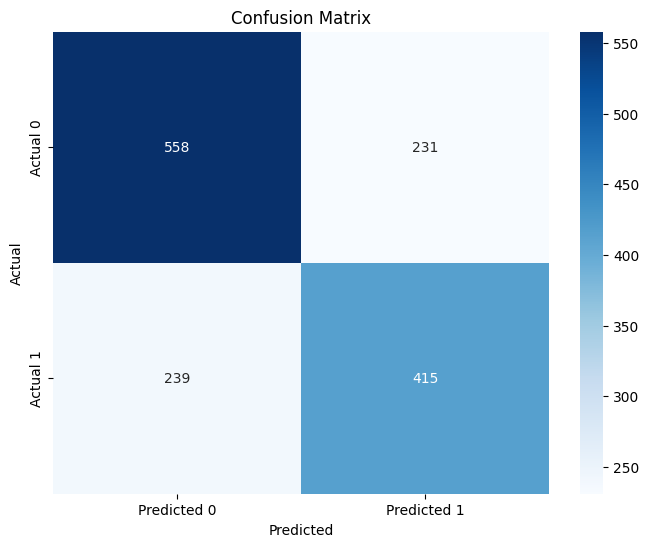

In [ ]:
# Calculate accuracy
accuracy_7 = accuracy_score(y_test_is_recid, y_pred_7)
print(f"Accuracy: {accuracy_7}")

# Generate classification report
class_report_7 = classification_report(y_test_is_recid, y_pred_7)
print("Classification Report:\n", class_report_7)

# Generate confusion matrix
conf_matrix_7 = confusion_matrix(y_test_is_recid, y_pred_7)
print("Confusion Matrix:\n", conf_matrix_7)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_7, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_8 = GradientBoostingClassifier(random_state=42)
model_8.fit(X_train, y_train_is_recid)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_8 = model_8.predict(X_test)

Accuracy: 0.683991683991684
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       823
           1       0.62      0.67      0.65       620

    accuracy                           0.68      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.69      0.68      0.69      1443

Confusion Matrix:
 [[570 253]
 [203 417]]


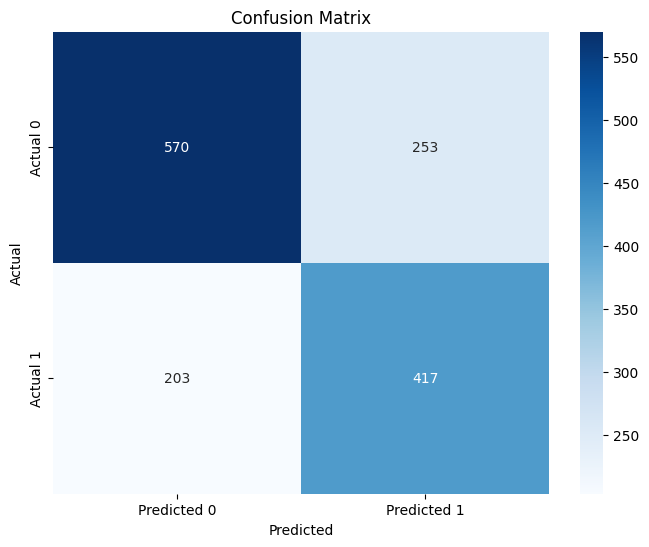

In [ ]:
# Calculate accuracy
accuracy_8 = accuracy_score(y_test_two_year_recid, y_pred_8)
print(f"Accuracy: {accuracy_8}")

# Generate classification report
class_report_8 = classification_report(y_test_two_year_recid, y_pred_8)
print("Classification Report:\n", class_report_8)

# Generate confusion matrix
conf_matrix_8 = confusion_matrix(y_test_two_year_recid, y_pred_8)
print("Confusion Matrix:\n", conf_matrix_8)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_8, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SHAP

<ipython-input-186-cbb7a0e050a0>:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


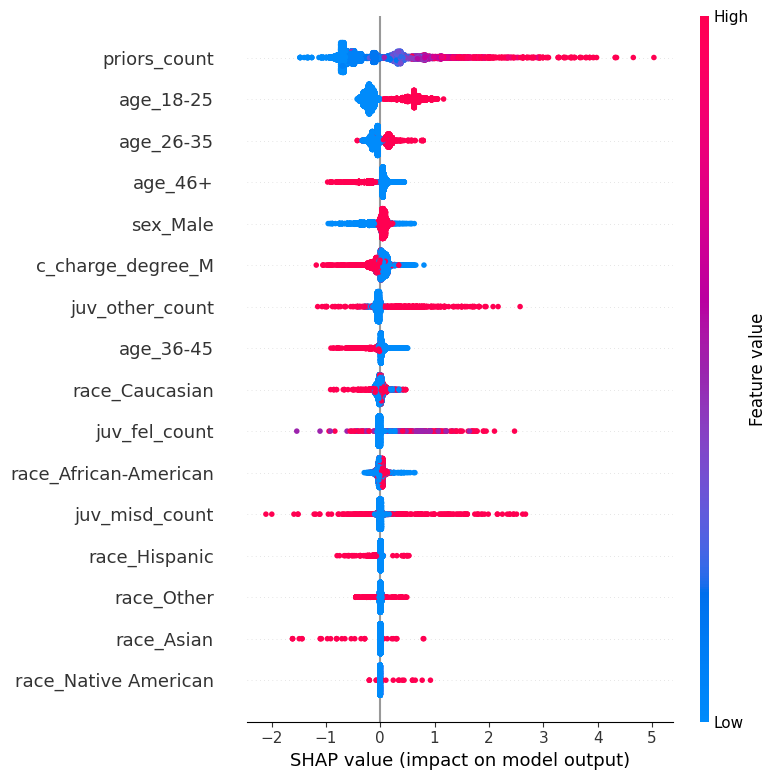

In [ ]:
# Two year XGB
import shap
explainer = shap.Explainer(model_1)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [ ]:
# import shap

# explainer = shap.KernelExplainer(model_2.predict, shap.sample(X_train, 100))
# shap_values = explainer.shap_values(X)

# shap.summary_plot(shap_values, X)

<ipython-input-188-ddb56b413ccc>:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


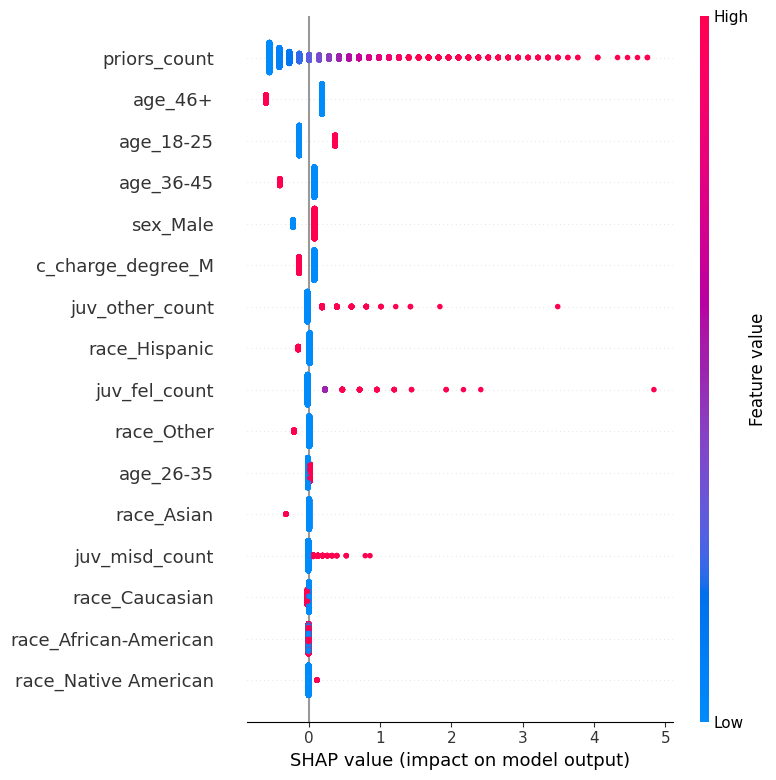

In [ ]:
# Two year recid Logistic
import shap

explainer = shap.LinearExplainer(model_3, X_train)  # Use LinearExplainer for Logistic Regression
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

<ipython-input-189-5c40db7e8554>:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


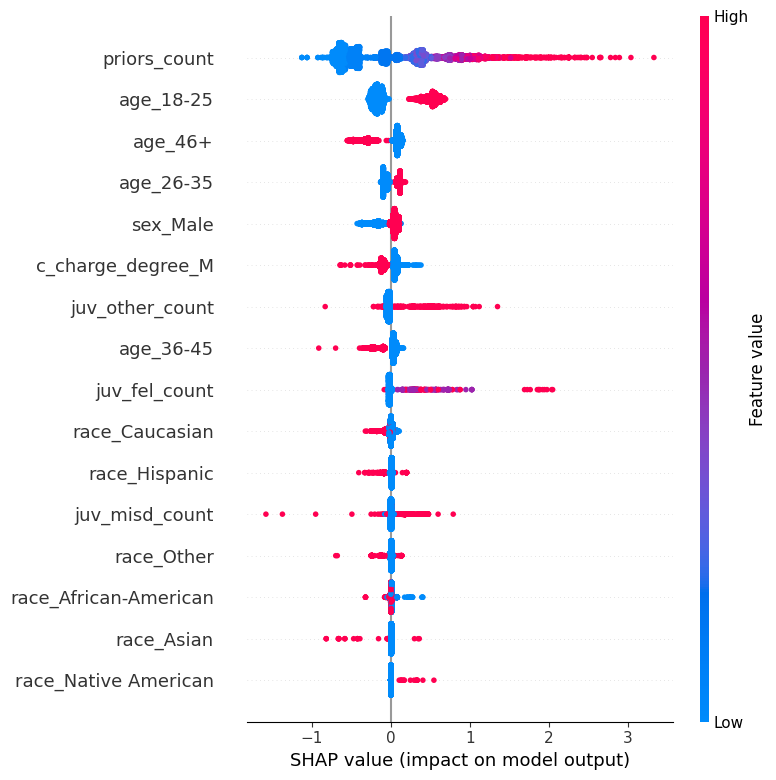

In [ ]:
# Two year GBDT
import shap
explainer = shap.Explainer(model_4)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

<ipython-input-190-43ec3d259858>:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


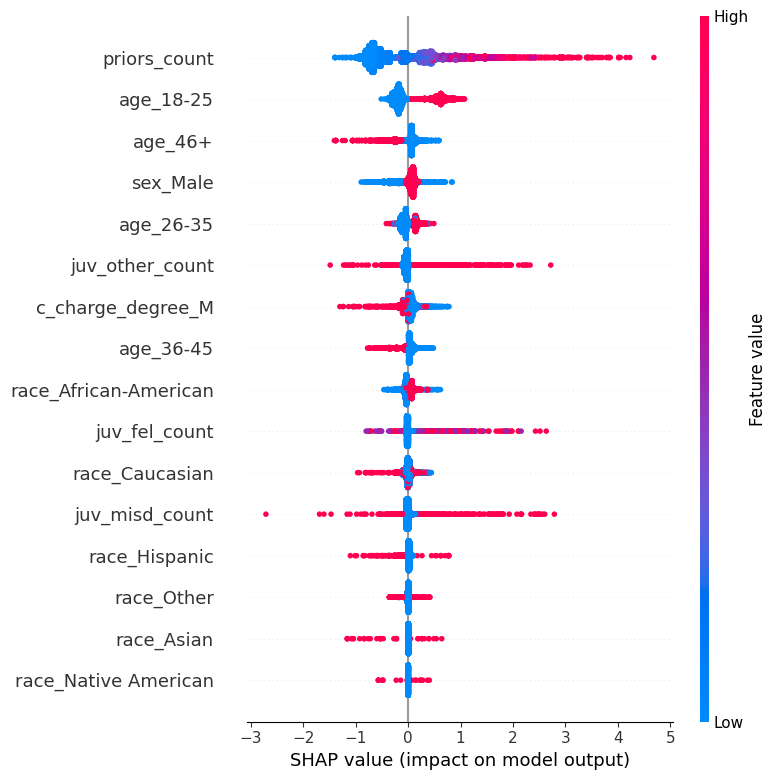

In [ ]:
# Is recid XGB
import shap
explainer = shap.Explainer(model_5)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

<ipython-input-191-d8fe80003660>:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


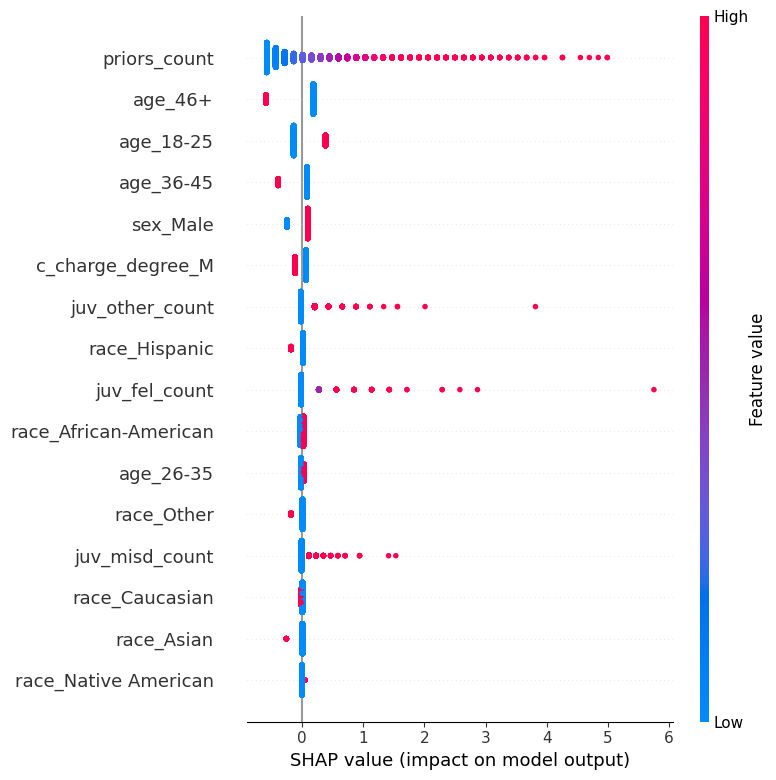

In [ ]:
# Is recid Logistic
import shap

explainer = shap.LinearExplainer(model_7, X_train)  # Use LinearExplainer for Logistic Regression
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

<ipython-input-192-690faf66f6d4>:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


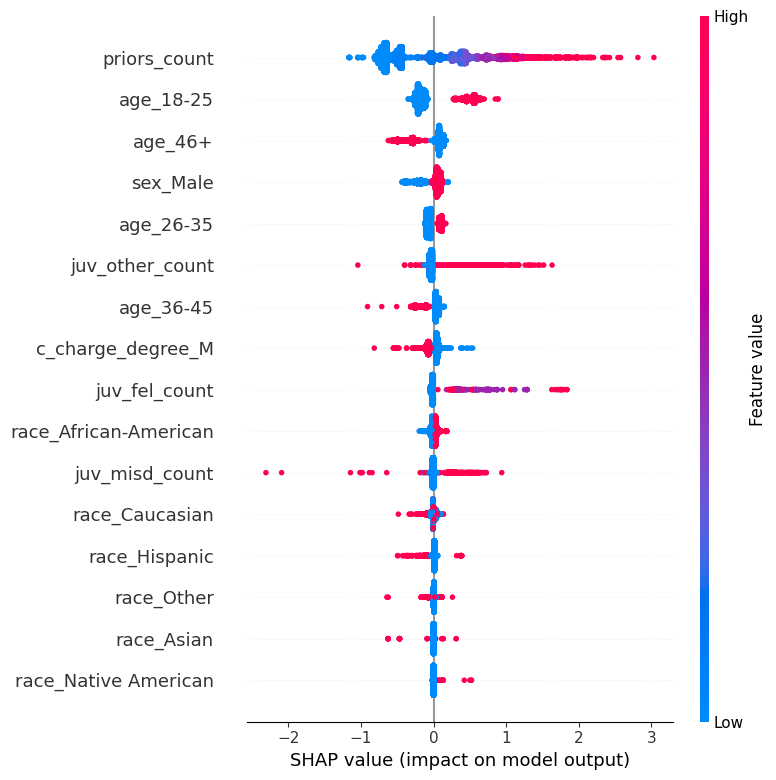

In [ ]:
# Is recid GBDT
import shap
explainer = shap.Explainer(model_8)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [ ]:
# import shap
# import numpy as np

# # Select a small subset of training data as background
# background = X_train.sample(50, random_state=42)

# # Initialize KernelExplainer
# explainer = shap.KernelExplainer(model_2.predict, background)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_test)

# # Visualize summary plot
# shap.summary_plot(shap_values, X_test)

# Fairlearn

## two_year_recid

### Sex

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['sex_Male']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_1,
    "SVC": y_pred_2,
    "Logistic Regression": y_pred_3,
    "GBDT": y_pred_4
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6735966735966736
XGB Accuracy by Group:
sex_Male
0    0.696000
1    0.668902
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6923076923076923
SVC Accuracy by Group:
sex_Male
0    0.720000
1    0.686505
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6832986832986833
Logistic Regression Accuracy by Group:
sex_Male
0    0.696000
1    0.680637
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6909216909216909
GBDT Accuracy by Group:
sex_Male
0    0.72400
1    0.68399
Name: accuracy_score, dtype: float64



### Race

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['race_African-American']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_1,
    "SVC": y_pred_2,
    "Logistic Regression": y_pred_3,
    "GBDT": y_pred_4
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6735966735966736
XGB Accuracy by Group:
race_African-American
0    0.682584
1    0.664843
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6923076923076923
SVC Accuracy by Group:
race_African-American
0    0.691011
1    0.693570
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6832986832986833
Logistic Regression Accuracy by Group:
race_African-American
0    0.681180
1    0.685363
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6909216909216909
GBDT Accuracy by Group:
race_African-American
0    0.692416
1    0.689466
Name: accuracy_score, dtype: float64



## is_recid

### Sex

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['sex_Male']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_5,
    "SVC": y_pred_6,
    "Logistic Regression": y_pred_7,
    "GBDT": y_pred_8
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6729036729036729
XGB Accuracy by Group:
sex_Male
0    0.704000
1    0.666387
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6888426888426888
SVC Accuracy by Group:
sex_Male
0    0.724000
1    0.681475
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6784476784476784
Logistic Regression Accuracy by Group:
sex_Male
0    0.704000
1    0.673093
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.683991683991684
GBDT Accuracy by Group:
sex_Male
0    0.720000
1    0.676446
Name: accuracy_score, dtype: float64



### Race

In [ ]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['race_African-American']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_5,
    "SVC": y_pred_6,
    "Logistic Regression": y_pred_7,
    "GBDT": y_pred_8
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6729036729036729
XGB Accuracy by Group:
race_African-American
0    0.679775
1    0.666211
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6888426888426888
SVC Accuracy by Group:
race_African-American
0    0.688202
1    0.689466
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6784476784476784
Logistic Regression Accuracy by Group:
race_African-American
0    0.678371
1    0.678523
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.683991683991684
GBDT Accuracy by Group:
race_African-American
0    0.693820
1    0.674419
Name: accuracy_score, dtype: float64



# LIME (Not useful)

In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=['No', 'Yes'],
    mode='classification'
)

# Explain an instance (e.g., first row)
exp = explainer.explain_instance(X.iloc[0].values, model_1.predict_proba)
exp.show_in_notebook()

# In processing and post processing

In [ ]:
!pip install aif360

## Only for sex


### XGB

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from aif360.metrics import ClassificationMetric
# from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
# from aif360.algorithms.inprocessing import AdversarialDebiasing
# import tensorflow as tf
# from aif360.datasets import BinaryLabelDataset
# from fairlearn.metrics import MetricFrame

# tf.compat.v1.disable_eager_execution()

# def print_metrics(name, dataset_true, dataset_pred):
#     metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
#     accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
#     print(f"{name} Disparate Impact: {metric.disparate_impact()}")
#     print(f"{name} Accuracy: {accuracy}\n")

#     # Fairlearn Accuracy by Group
#     y_true = dataset_true.labels.flatten()
#     y_pred = dataset_pred.labels.flatten()
#     fair_metrics = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=X_test['sex_Male'])
#     print(f"{name} Fairlearn Overall Accuracy: {fair_metrics.overall}")
#     print(f"{name} Fairlearn Accuracy by Group:\n{fair_metrics.by_group}\n")

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# # Prepare the datasets for aif360
# df_train = X_train.copy()
# df_train['label'] = y_train
# dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

# df_test = X_test.copy()
# df_test['label'] = y_test
# dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# # Define privileged and unprivileged groups
# privileged_groups = [{'sex_Male': 1}]  # Males are privileged
# unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# # Initial Model
# clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# df_pred = X_test.copy()
# df_pred['label'] = y_pred
# dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# # Print Initial Model Metrics (Before Debiasing)
# print_metrics("Initial Model", dataset_test, dataset_pred)

# # Adversarial Debiasing
# tf.compat.v1.reset_default_graph()
# sess = tf.compat.v1.Session()
# adv_debiasing = AdversarialDebiasing(
#     privileged_groups=privileged_groups,
#     unprivileged_groups=unprivileged_groups,
#     scope_name='adv_debiasing',
#     debias=True,
#     sess=sess
# )
# adv_debiasing.fit(dataset_train)
# dataset_adv_pred = adv_debiasing.predict(dataset_test)

# # Print Adversarial Debiasing Metrics
# print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# # Post-Processing Techniques (ROC, CEO, EO)
# roc = RejectOptionClassification(
#     unprivileged_groups=unprivileged_groups,
#     privileged_groups=privileged_groups,
#     low_class_thresh=0.3,
#     high_class_thresh=0.7,
#     num_class_thresh=100
# )
# roc.fit(dataset_test, dataset_adv_pred)
# dataset_transf_adv_pred = roc.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + ROC", dataset_test, dataset_transf_adv_pred)

# ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
# ceo.fit(dataset_test, dataset_adv_pred)
# dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + CEO", dataset_test, dataset_ceo_adv_pred)

# eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
# eqo.fit(dataset_test, dataset_adv_pred)
# dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + EO", dataset_test, dataset_eqo_adv_pred)

# # Close the TensorFlow session
# sess.close()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
from aif360.datasets import BinaryLabelDataset
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 1.9409671169252334
Initial Model Accuracy: 0.6687456687456688

epoch 0; iter: 0; batch classifier loss: 0.675808; batch adversarial loss: 0.630831
epoch 1; iter: 0; batch classifier loss: 0.645961; batch adversarial loss: 0.647464
epoch 2; iter: 0; batch classifier loss: 0.620180; batch adversarial loss: 0.652015
epoch 3; iter: 0; batch classifier loss: 0.687045; batch adversarial loss: 0.631909
epoch 4; iter: 0; batch classifier loss: 0.774312; batch adversarial loss: 0.684826
epoch 5; iter: 0; batch classifier loss: 0.869039; batch adversarial loss: 0.656445
epoch 6; iter: 0; batch classifier loss: 0.834181; batch adversarial loss: 0.645294
epoch 7; iter: 0; batch classifier loss: 0.946357; batch adversarial loss: 0.626276
epoch 8; iter: 0; batch classifier loss: 0.813402; batch adversarial loss: 0.607925
epoch 9; iter: 0; batch classifier loss: 0.853581; batch adversarial loss: 0.581555
epoch 10; iter: 0; batch classifier loss: 0.686227; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 1.9409671169252334
Post-Processed ROC (Initial Model) Accuracy: 0.6687456687456688

Post-Processed CEO (Initial Model) Disparate Impact: 2.2769037333161393
Post-Processed CEO (Initial Model) Accuracy: 0.6666666666666666

Post-Processed EO (Initial Model) Disparate Impact: 1.0875677740405532
Post-Processed EO (Initial Model) Accuracy: 0.6237006237006237

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 1.1329826920774113
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6860706860706861

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 2.075407827712941
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6791406791406791

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.1073115903375754
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6708246708246708



### SVC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 1.86155350656608
Initial Model Accuracy: 0.6846846846846847

epoch 0; iter: 0; batch classifier loss: 0.728774; batch adversarial loss: 0.678458
epoch 1; iter: 0; batch classifier loss: 0.657486; batch adversarial loss: 0.652155
epoch 2; iter: 0; batch classifier loss: 0.720877; batch adversarial loss: 0.623180
epoch 3; iter: 0; batch classifier loss: 0.631259; batch adversarial loss: 0.621365
epoch 4; iter: 0; batch classifier loss: 0.676850; batch adversarial loss: 0.603460
epoch 5; iter: 0; batch classifier loss: 0.632097; batch adversarial loss: 0.587746
epoch 6; iter: 0; batch classifier loss: 0.621202; batch adversarial loss: 0.606137
epoch 7; iter: 0; batch classifier loss: 0.625989; batch adversarial loss: 0.568041
epoch 8; iter: 0; batch classifier loss: 0.615346; batch adversarial loss: 0.565640
epoch 9; iter: 0; batch classifier loss: 0.592494; batch adversarial loss: 0.604584
epoch 10; iter: 0; batch classifier loss: 0.597346; batch adversari

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 1.86155350656608
Post-Processed ROC (Initial Model) Accuracy: 0.6846846846846847

Post-Processed CEO (Initial Model) Disparate Impact: 2.1479463537300925
Post-Processed CEO (Initial Model) Accuracy: 0.681912681912682

Post-Processed EO (Initial Model) Disparate Impact: 1.1068841747802352
Post-Processed EO (Initial Model) Accuracy: 0.665973665973666

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 1.0517325910579007
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.683991683991684

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.208600557515741
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.683991683991684

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.081386705467428
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6638946638946639



### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 3.2615470586971007
Initial Model Accuracy: 0.6742896742896742

epoch 0; iter: 0; batch classifier loss: 0.868587; batch adversarial loss: 0.662148
epoch 1; iter: 0; batch classifier loss: 0.644137; batch adversarial loss: 0.650709
epoch 2; iter: 0; batch classifier loss: 0.725395; batch adversarial loss: 0.628722
epoch 3; iter: 0; batch classifier loss: 0.681713; batch adversarial loss: 0.598010
epoch 4; iter: 0; batch classifier loss: 0.681673; batch adversarial loss: 0.585691
epoch 5; iter: 0; batch classifier loss: 0.655443; batch adversarial loss: 0.602804
epoch 6; iter: 0; batch classifier loss: 0.650533; batch adversarial loss: 0.597204
epoch 7; iter: 0; batch classifier loss: 0.630469; batch adversarial loss: 0.576386
epoch 8; iter: 0; batch classifier loss: 0.696533; batch adversarial loss: 0.588739
epoch 9; iter: 0; batch classifier loss: 0.693473; batch adversarial loss: 0.638787
epoch 10; iter: 0; batch classifier loss: 0.663356; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 3.2615470586971007
Post-Processed ROC (Initial Model) Accuracy: 0.6742896742896742

Post-Processed CEO (Initial Model) Disparate Impact: 3.437846899707755
Post-Processed CEO (Initial Model) Accuracy: 0.6742896742896742

Post-Processed EO (Initial Model) Disparate Impact: 1.0947480995462033
Post-Processed EO (Initial Model) Accuracy: 0.6056826056826057

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 1.0012107665083356
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6826056826056826

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.455562855395211
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.683991683991684

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.0788240042221602
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6507276507276507



### GBDT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 2.1701450551948516
Initial Model Accuracy: 0.6826056826056826

epoch 0; iter: 0; batch classifier loss: 0.752012; batch adversarial loss: 0.648957
epoch 1; iter: 0; batch classifier loss: 0.642440; batch adversarial loss: 0.646992
epoch 2; iter: 0; batch classifier loss: 0.668375; batch adversarial loss: 0.638196
epoch 3; iter: 0; batch classifier loss: 0.622729; batch adversarial loss: 0.636430
epoch 4; iter: 0; batch classifier loss: 0.700855; batch adversarial loss: 0.635217
epoch 5; iter: 0; batch classifier loss: 0.705578; batch adversarial loss: 0.639248
epoch 6; iter: 0; batch classifier loss: 0.786880; batch adversarial loss: 0.668812
epoch 7; iter: 0; batch classifier loss: 0.830033; batch adversarial loss: 0.619748
epoch 8; iter: 0; batch classifier loss: 0.796483; batch adversarial loss: 0.611537
epoch 9; iter: 0; batch classifier loss: 0.790517; batch adversarial loss: 0.624024
epoch 10; iter: 0; batch classifier loss: 0.775048; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 2.1701450551948516
Post-Processed ROC (Initial Model) Accuracy: 0.6826056826056826

Post-Processed CEO (Initial Model) Disparate Impact: 2.510559965813652
Post-Processed CEO (Initial Model) Accuracy: 0.6798336798336798

Post-Processed EO (Initial Model) Disparate Impact: 1.0957493006392713
Post-Processed EO (Initial Model) Accuracy: 0.6417186417186417

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 1.132056561828055
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6874566874566874

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.6990134760461666
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6881496881496881

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.1001676445934618
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6805266805266805



## Only for race

### XGB

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_African-American'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_African-American'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_African-American': 0}]  # Non-African-Americans are privileged
unprivileged_groups = [{'race_African-American': 1}]  # African-Americans are unprivileged

# Initial Model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_African-American'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.4610577923429047
Initial Model Accuracy: 0.6687456687456688

epoch 0; iter: 0; batch classifier loss: 0.868587; batch adversarial loss: 0.717690
epoch 1; iter: 0; batch classifier loss: 0.656130; batch adversarial loss: 0.690144
epoch 2; iter: 0; batch classifier loss: 0.711936; batch adversarial loss: 0.681943
epoch 3; iter: 0; batch classifier loss: 0.655852; batch adversarial loss: 0.685541
epoch 4; iter: 0; batch classifier loss: 0.687218; batch adversarial loss: 0.690351
epoch 5; iter: 0; batch classifier loss: 0.642697; batch adversarial loss: 0.689914
epoch 6; iter: 0; batch classifier loss: 0.628732; batch adversarial loss: 0.688094
epoch 7; iter: 0; batch classifier loss: 0.602162; batch adversarial loss: 0.700058
epoch 8; iter: 0; batch classifier loss: 0.619517; batch adversarial loss: 0.701780
epoch 9; iter: 0; batch classifier loss: 0.631161; batch adversarial loss: 0.686710
epoch 10; iter: 0; batch classifier loss: 0.616085; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.4610577923429047
Post-Processed ROC (Initial Model) Accuracy: 0.6687456687456688

Post-Processed CEO (Initial Model) Disparate Impact: 0.43016216708281313
Post-Processed CEO (Initial Model) Accuracy: 0.6666666666666666

Post-Processed EO (Initial Model) Disparate Impact: 0.9114451960559504
Post-Processed EO (Initial Model) Accuracy: 0.6126126126126126

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9319144338807259
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6729036729036729

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 0.8185258118074057
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6611226611226612

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9005497592295345
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6528066528066528



### SVC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_African-American'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_African-American'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_African-American': 0}]  # Non-African-Americans are privileged
unprivileged_groups = [{'race_African-American': 1}]  # African-Americans are unprivileged

# Initial Model
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_African-American'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.554676783890267
Initial Model Accuracy: 0.6846846846846847

epoch 0; iter: 0; batch classifier loss: 0.868587; batch adversarial loss: 0.717690
epoch 1; iter: 0; batch classifier loss: 0.656130; batch adversarial loss: 0.690144
epoch 2; iter: 0; batch classifier loss: 0.711936; batch adversarial loss: 0.681943
epoch 3; iter: 0; batch classifier loss: 0.655852; batch adversarial loss: 0.685541
epoch 4; iter: 0; batch classifier loss: 0.687218; batch adversarial loss: 0.690351
epoch 5; iter: 0; batch classifier loss: 0.642697; batch adversarial loss: 0.689914
epoch 6; iter: 0; batch classifier loss: 0.628732; batch adversarial loss: 0.688094
epoch 7; iter: 0; batch classifier loss: 0.602162; batch adversarial loss: 0.700058
epoch 8; iter: 0; batch classifier loss: 0.619517; batch adversarial loss: 0.701780
epoch 9; iter: 0; batch classifier loss: 0.631161; batch adversarial loss: 0.686710
epoch 10; iter: 0; batch classifier loss: 0.616085; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.554676783890267
Post-Processed ROC (Initial Model) Accuracy: 0.6846846846846847

Post-Processed CEO (Initial Model) Disparate Impact: 0.5489731665752
Post-Processed CEO (Initial Model) Accuracy: 0.6832986832986833

Post-Processed EO (Initial Model) Disparate Impact: 0.8832514044943821
Post-Processed EO (Initial Model) Accuracy: 0.6368676368676369

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9319144338807259
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6729036729036729

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 0.8185258118074057
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6611226611226612

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9005497592295345
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6528066528066528



### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_African-American'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_African-American'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_African-American': 0}]  # Non-African-Americans are privileged
unprivileged_groups = [{'race_African-American': 1}]  # African-Americans are unprivileged

# Initial Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_African-American'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.4504610745476839
Initial Model Accuracy: 0.6742896742896742

epoch 0; iter: 0; batch classifier loss: 0.868587; batch adversarial loss: 0.717690
epoch 1; iter: 0; batch classifier loss: 0.656130; batch adversarial loss: 0.690144
epoch 2; iter: 0; batch classifier loss: 0.711936; batch adversarial loss: 0.681943
epoch 3; iter: 0; batch classifier loss: 0.655852; batch adversarial loss: 0.685541
epoch 4; iter: 0; batch classifier loss: 0.687218; batch adversarial loss: 0.690351
epoch 5; iter: 0; batch classifier loss: 0.642697; batch adversarial loss: 0.689914
epoch 6; iter: 0; batch classifier loss: 0.628732; batch adversarial loss: 0.688094
epoch 7; iter: 0; batch classifier loss: 0.602162; batch adversarial loss: 0.700058
epoch 8; iter: 0; batch classifier loss: 0.619517; batch adversarial loss: 0.701780
epoch 9; iter: 0; batch classifier loss: 0.631161; batch adversarial loss: 0.686710
epoch 10; iter: 0; batch classifier loss: 0.616085; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.4504610745476839
Post-Processed ROC (Initial Model) Accuracy: 0.6742896742896742

Post-Processed CEO (Initial Model) Disparate Impact: 0.44747128865466834
Post-Processed CEO (Initial Model) Accuracy: 0.6735966735966736

Post-Processed EO (Initial Model) Disparate Impact: 0.9063153816350251
Post-Processed EO (Initial Model) Accuracy: 0.6202356202356203

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9319144338807259
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6729036729036729

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 0.8185258118074057
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6611226611226612

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9005497592295345
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6528066528066528



### GBDT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_African-American'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_African-American'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_African-American': 0}]  # Non-African-Americans are privileged
unprivileged_groups = [{'race_African-American': 1}]  # African-Americans are unprivileged

# Initial Model
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_African-American'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.5019350811485643
Initial Model Accuracy: 0.6826056826056826

epoch 0; iter: 0; batch classifier loss: 0.868587; batch adversarial loss: 0.717690
epoch 1; iter: 0; batch classifier loss: 0.656130; batch adversarial loss: 0.690144
epoch 2; iter: 0; batch classifier loss: 0.711936; batch adversarial loss: 0.681943
epoch 3; iter: 0; batch classifier loss: 0.655852; batch adversarial loss: 0.685541
epoch 4; iter: 0; batch classifier loss: 0.687218; batch adversarial loss: 0.690351
epoch 5; iter: 0; batch classifier loss: 0.642697; batch adversarial loss: 0.689914
epoch 6; iter: 0; batch classifier loss: 0.628732; batch adversarial loss: 0.688094
epoch 7; iter: 0; batch classifier loss: 0.602162; batch adversarial loss: 0.700058
epoch 8; iter: 0; batch classifier loss: 0.619517; batch adversarial loss: 0.701780
epoch 9; iter: 0; batch classifier loss: 0.631161; batch adversarial loss: 0.686710
epoch 10; iter: 0; batch classifier loss: 0.616085; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.5019350811485643
Post-Processed ROC (Initial Model) Accuracy: 0.6826056826056826

Post-Processed CEO (Initial Model) Disparate Impact: 0.4585861423220974
Post-Processed CEO (Initial Model) Accuracy: 0.681912681912682

Post-Processed EO (Initial Model) Disparate Impact: 0.9062530890638901
Post-Processed EO (Initial Model) Accuracy: 0.6257796257796258

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9319144338807259
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6729036729036729

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 0.8185258118074057
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6611226611226612

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9005497592295345
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6528066528066528



## Caucasian male privileged (didn't work since two parameters not allowed)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from aif360.metrics import ClassificationMetric
# from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
# from aif360.algorithms.inprocessing import AdversarialDebiasing
# import tensorflow as tf

# tf.compat.v1.disable_eager_execution()

# def print_metrics(name, dataset_true, dataset_pred):
#     metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
#     accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
#     print(f"{name} Disparate Impact: {metric.disparate_impact()}")
#     print(f"{name} Accuracy: {accuracy}\n")

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# # Prepare the datasets for aif360

# df_train = X_train.copy()
# df_train['label'] = y_train
# dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'],
#                                   protected_attribute_names=['race_Caucasian', 'sex_Male'])

# df_test = X_test.copy()
# df_test['label'] = y_test
# dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'],
#                                  protected_attribute_names=['race_Caucasian', 'sex_Male'])

# # Define privileged and unprivileged groups
# privileged_groups = [{'race_Caucasian': 1, 'sex_Male': 1}]  # Caucasian Males
# unprivileged_groups = [{'race_Caucasian': 0}, {'sex_Male': 0}]  # Everyone else

# # Initial Model
# clf = LogisticRegression(random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# df_pred = X_test.copy()
# df_pred['label'] = y_pred
# dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian', 'sex_Male'])

# # Print Initial Model Metrics
# print_metrics("Initial Model", dataset_test, dataset_pred)

# # Adversarial Debiasing

# tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
# sess = tf.compat.v1.Session()
# adv_debiasing = AdversarialDebiasing(
#     privileged_groups=privileged_groups,
#     unprivileged_groups=unprivileged_groups,
#     scope_name='adv_debiasing',
#     debias=True,
#     sess=sess
# )
# adv_debiasing.fit(dataset_train)
# dataset_adv_pred = adv_debiasing.predict(dataset_test)

# # Print Adversarial Debiasing Metrics
# print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# # Post-Processing Techniques (ROC, CEO, EO)
# roc = RejectOptionClassification(
#     unprivileged_groups=unprivileged_groups,
#     privileged_groups=privileged_groups,
#     low_class_thresh=0.3,
#     high_class_thresh=0.7,
#     num_class_thresh=100
# )
# roc.fit(dataset_test, dataset_pred)
# dataset_transf_pred = roc.predict(dataset_pred)

# ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
# ceo.fit(dataset_test, dataset_pred)
# dataset_ceo_pred = ceo.predict(dataset_pred)

# eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
# eqo.fit(dataset_test, dataset_pred)
# dataset_eqo_pred = eqo.predict(dataset_pred)


# # Print Post-Processing Metrics for Initial Model
# print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
# print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
# print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# # Apply Post-Processing to Adversarial Debiasing Model Predictions
# roc.fit(dataset_test, dataset_adv_pred)
# dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

# ceo.fit(dataset_test, dataset_adv_pred)
# dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

# eqo.fit(dataset_test, dataset_adv_pred)
# dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# # Print Post-Processing Metrics for Adversarial Debiasing Model
# print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
# print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
# print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# # Close the TensorFlow session
# sess.close()


In [ ]:
len(X[(X['race_Caucasian'] == 1) & (X['sex_Male'] == 1)]), len(X)

(1887, 7214)

In [ ]:
df.columns

Index(['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'is_recid', 'is_violent_recid', 'two_year_recid',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Male',
       'age_18-25', 'age_26-35', 'age_36-45', 'age_46+', 'c_charge_degree_M'],
      dtype='object')

In [ ]:
df.is_violent_recid.value_counts()

,count
is_violent_recid,
0,6395
1,819
